# Linear Regression vs Random Forest Model

## Objective
To run and compare the accuracy and interpretability of both models and see which one is better contextually

### Installing and Importing Libraries

In [1]:
pip install numpy pandas scikit_learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.datasets import fetch_california_housing
# Load California housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target  # Target variable
# Show the first few rows
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


Dataset is now active and printed 

### Splitting data into features (IV) and targets (DV)

In [24]:
from sklearn.model_selection import train_test_split


In [18]:
X=data.drop('PRICE', axis=1) 

#Features, we have dropped the target so all other features will be loaded as X

y=data['PRICE']

#Price is our target variable

## Training Linear Regression Model

In [26]:
#Now for the training and testing

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.2, random_state=42)

#where .2 means 20% of my dataset (sample) will be used to test the model which means 80% of the data is going to be used for training, and random_state is for randomly splitting data in a specific way to avoid biases, same number (42) will be used over each model run so data does not split randomly every time


In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [34]:
lin_reg.fit(X_train,y_train)

LinearRegression()

Regression Line is fitted

### Prediction of Linear Regression Model

In [37]:
#Making the Prediction

y_pred_lin_reg=lin_reg.predict(X_test)

#Calculating Mean Squared Error (MSE)
#MSE is the mean squared deviation i.e., it measures the average of the squared differences between predicted and actual values.

from sklearn.metrics import mean_squared_error

mse_lin_reg=mean_squared_error(y_test, y_pred_lin_reg)
print(f"Linear Regression MSE: {mse_lin_reg:.2f}") 

#where f"..." is to define the format and .2f means to give the value of result upto 2 decimal points

Linear Regression MSE: 0.56


### Visualizing the Data

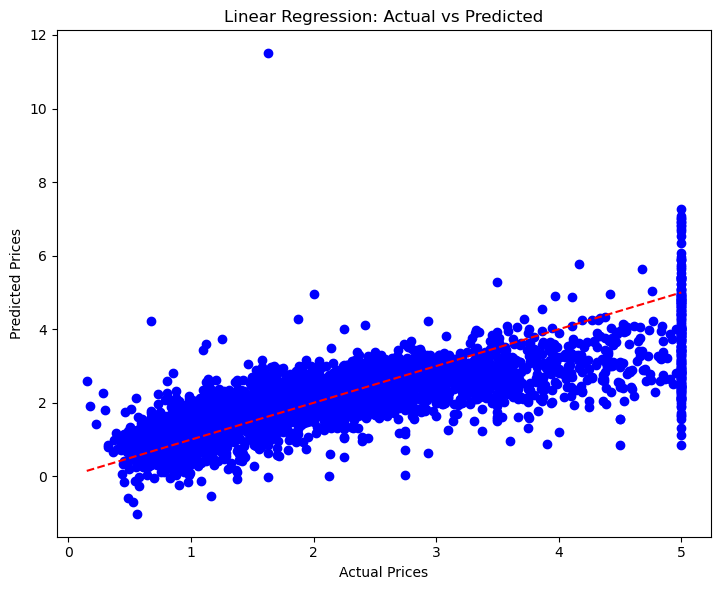

In [39]:
# Plot Actual vs Predicted values for Linear Regresison Model

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin_reg, color='blue')

#Scatter plots are usually used to visualize regression models and see the line of fit

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

## Training Random Forest Model

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(X_train, y_train)

# n_estimators is a parameter used in ensemble models, it controls how many trees (or estimators) the model will build.

RandomForestRegressor(random_state=42)

### Predicting the Results 

In [54]:
y_pred_rf=rf_reg.predict(X_test)

#same command as was used to predict the results of linear regression model
#now we'll calculate the MSE as well just like before

mse_rf=mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE:{mse_rf:.2f}") 

Random Forest MSE:0.26


### Data Visualization

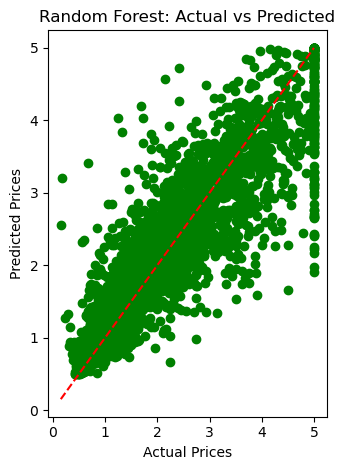

In [58]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

# Interpretation of Results

Two computer models were trained to predict house prices in California based on things like number of rooms, location, income, etc.

1. Linear Regression (a simple, straight-line method)
2. Random Forest (a smart method that uses many decision trees)

### Results
Linear Regression made an average error of around 72,000 rupees (or 0.72 in 100,000s corresponding to an MSE of 0.56) per house.
Random Forest made an average error of around 50,000 rupees (0.5 in 100,000s corresponding to an MSE of 0.26) per house.

The accuracy of Linear Regression Model was decent, but not very precise
Random Forest Model was comparatively more accurate

Linear Regression is like asking one expert for a price estimate.
Random Forest is like asking 100 experts and taking the average — that’s why it's usually more accurate.

## Conclusion
If your goal is predictive performance → Go with Random Forest.
If you want insight into how features influence prices → Use Linear Regression, or use both and compare.

Thank you for reading!